In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv('student_info.csv')
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [77]:
df.shape

(200, 2)

In [78]:
df.info()

AttributeError: 'list' object has no attribute '_get_axis_number'

In [ ]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


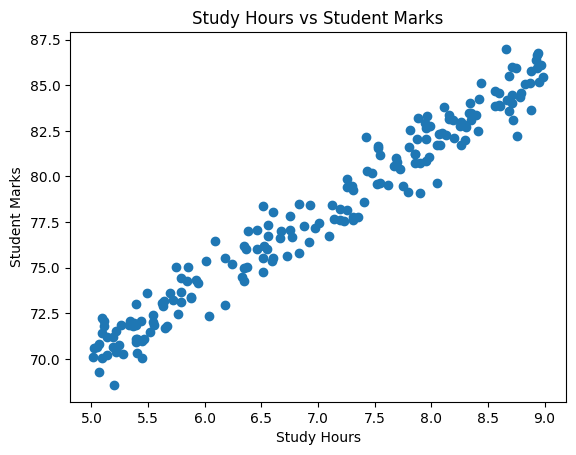

In [ ]:
plt.scatter(x = df.study_hours, y = df.student_marks)
plt.xlabel('Study Hours')
plt.ylabel('Student Marks')
plt.title('Study Hours vs Student Marks')
plt.show()

In [ ]:
# data cleaning
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [ ]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [ ]:
df2 = df.fillna(df.mean())
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [ ]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [ ]:
# split dataset 

X = df.drop("student_marks", axis= "columns")
y = df.drop("study_hours", axis= "columns")

print("shape of X", X.shape)
print("shape of y", y.shape)

shape of X (200, 1)
shape of y (200, 1)


In [ ]:
# split dataset into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 1)
(160, 1)
(40, 1)
(40, 1)


In [ ]:
# select a model and test it
# y = mx + c
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(lr.coef_) # m
print(lr.intercept_) # c

[[3.93571802]]
[50.44735504]


In [ ]:
m = 3.93
c = 50.44

y = m * 4 + c
y

66.16

In [ ]:
lr.predict([[4]])[0][0].round(2)

c:\Users\Aryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


66.19

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [80]:
# pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks-original", "predicted_marks"])
# creating a dataframe with actual and predicted values
df3 = pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks-original", "predicted_marks"])

TypeError: 'list' object is not callable

In [82]:
lr.score(X_test, y_test)

0.9514124242154464

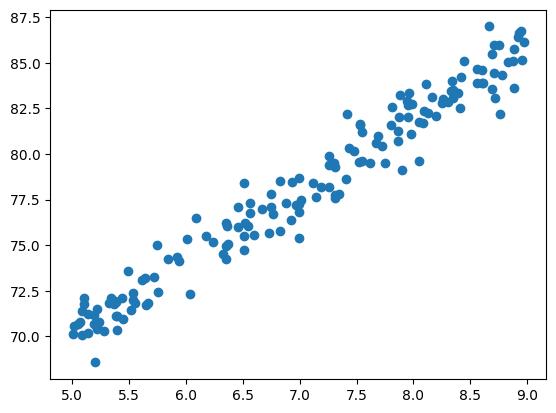

In [84]:
plt.scatter(X_train, y_train)

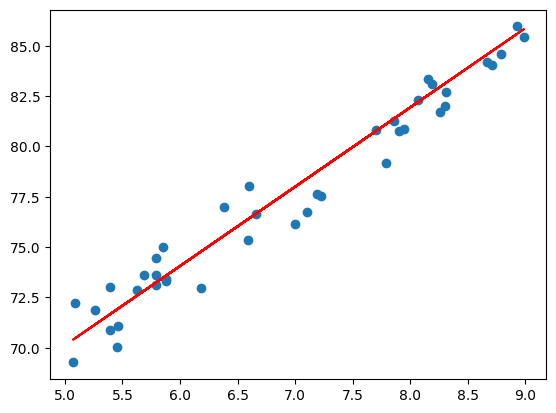

In [88]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color = "red")

In [90]:
# save the model
import joblib
joblib.dump(lr, "student_marks_predictor_model.pkl")

['student_marks_predictor_model.pkl']

In [91]:
model = joblib.load("student_marks_predictor_model.pkl")


In [96]:
model.predict([[5]])[0][0].round(2)

c:\Users\Aryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.13